In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.ndimage import gaussian_filter1d
import json
from scipy.special import expit
from scipy import signal
from scipy.optimize import curve_fit

### Gaussian function and threshold calculator 

In [234]:
def gaus(X,C,X_mean,sigma):
    return C*np.exp(-(X-X_mean)**2/(2*sigma**2))    

In [246]:
def calculate_eye_vergence_threshold(data):
    
    left = data['L_EYE'].fillna(method='ffill')
    right = data['R_EYE'].fillna(method='ffill')    
    combined = np.concatenate([right,-left])
    
    hist, bin_edges = np.histogram(combined)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist
    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,method='dogbox',\
                                                        p0=[max(y_hist),mean,sigma],maxfev=5000)
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
    weights = np.ones_like(combined) / len(combined)
    
    ### Calculate full width at half maximum --> Threshold for event detector
    fwhm = 2*np.sqrt(2*np.log(2))*sigma 
    
    return fwhm
    

### Loading Data

In [216]:
for fish in range(0,41):
    exec(f'data{fish} = pd.read_csv("../raw_data/STIM_5_6_SIZEDOT_0.004_0.025/zfdata{fish}.csv")')

### Making Threshold List

In [257]:
threshold_list = [calculate_eye_vergence_threshold(df) for df in [data0,data1,data2,data3,data4,data5,data6,data7,\
                                                                 data8,data9,data10,data11,data12,data13,data14,\
                                                                 data15,data16,data17,data18,data19,data20,data21,\
                                                                 data22,data23,data24,data25,data26,data27,data28,\
                                                                 data29,data30,data31,data32,data33,data34,data35,\
                                                                 data36,data37,data38,data39,data40]]

### Plotting Gaussian Fit with Histogram

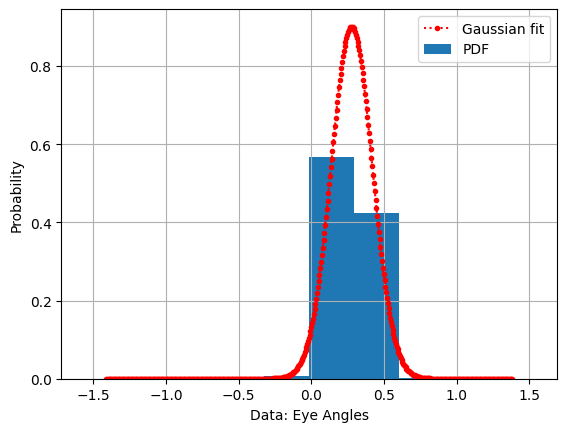

In [259]:
x_data=full

#plotting the histogram
hist, bin_edges = np.histogram(x_data)
hist=hist/sum(hist)

n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist

#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(X,C,X_mean,sigma):
    return C*np.exp(-(X-X_mean)**2/(2*sigma**2))

mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,method='dogbox',\
                                                    p0=[max(y_hist),mean,sigma],maxfev=5000)
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights,label='PDF')

#setting the label,title and grid of the plot
plt.xlabel("Data: Eye Angles")
plt.ylabel("Probability")
plt.legend()
plt.grid("on")
plt.show()

### Testing 